# Results of training three convolutional networks for simpson character recognition

### Table of Contents

- The first part presents results for a six and four convolutional network. These results reproduce results presented in https://github.com/alexattia/SimpsonRecognition/blob/master/Data%20Processing%20and%20Learning.ipynb
- The second part presents results obtained by using the VGG16 model plus a re-trained top model. This approach follows the solution for cat-vs-dog image classification presented in https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
# imports
import matplotlib.pyplot as plt
from main.keras_models import FourConv, SixConv
from main.vgg16_model import Vgg16
from main.data_preprocessing import load_data, DataSet
from main.monitoring import ModelMonitor
from main.constants import DATA_PATH, NUM_2_CHARACTER

Using TensorFlow backend.
/home/epamir/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
# load data
data = load_data(data_id='big', data_path=DATA_PATH)

# characters contained in this dataset (1000 images per character)
[NUM_2_CHARACTER[i] for i in data.label_binarizer.classes_]

['bart_simpson',
 'charles_montgomery_burns',
 'homer_simpson',
 'krusty_the_clown',
 'lisa_simpson',
 'marge_simpson',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'principal_skinner']

## Results for convolutional network with six layers
- Final validation accuracy equals 88% after 50 training epochs without any hyper-parameter tuning. Architecture and hyperparameter settings match the ones applied in https://github.com/alexattia/SimpsonRecognition/blob/master/train.py
- The model was just trained once on a laptop. Training time equals 30 minutes. 

In [4]:
# init model and monitor
model = SixConv(input_shape=data.x_train.shape[1:], n_classes=data.n_classes, model_id='six_conv_001')
monitor = ModelMonitor(data=data, model=model)

Loading trained weights from file /home/epamir/git_repos/simpsons/var/models/weights_six_conv_001.hdf5


In [5]:
# print classification report
monitor.print_classification_report()

                          precision    recall  f1-score   support

            bart_simpson       0.79      0.80      0.80       180
charles_montgomery_burns       0.82      0.77      0.79       193
           homer_simpson       0.82      0.82      0.82       205
        krusty_the_clown       0.93      0.95      0.94       193
            lisa_simpson       0.87      0.79      0.83       217
           marge_simpson       0.95      0.97      0.96       202
     milhouse_van_houten       0.96      0.96      0.96       200
             moe_szyslak       0.83      0.94      0.89       198
            ned_flanders       0.91      0.89      0.90       214
       principal_skinner       0.90      0.90      0.90       198

             avg / total       0.88      0.88      0.88      2000



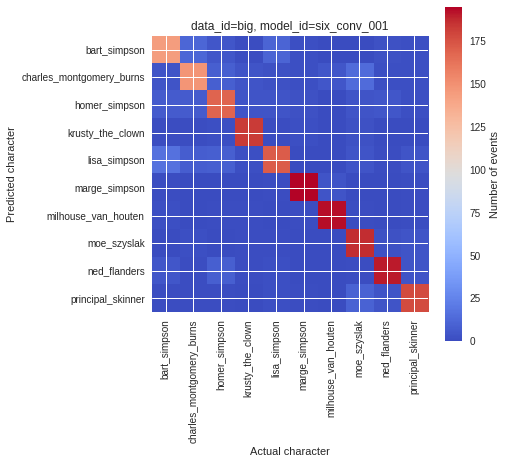

In [6]:
monitor.plot_confusion_matrix()

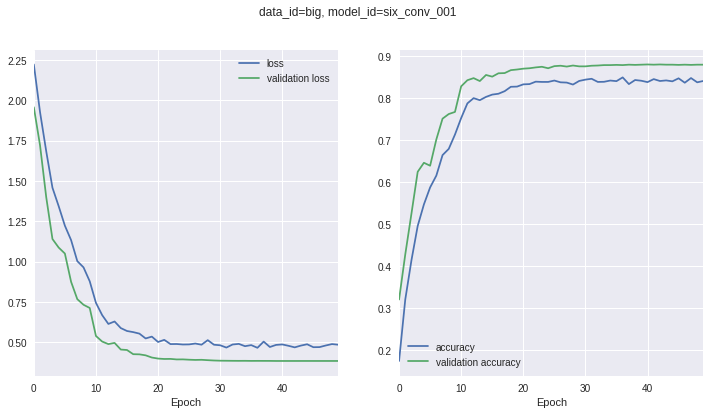

In [7]:
monitor.plot_history()

## Results for convolutional network with four layers
- Final validation accuracy equals 88% after 50 training epochs without any hyper-parameter tuning. Architecture and hyperparameter settings match the ones applied in https://github.com/alexattia/SimpsonRecognition/blob/master/train.py
The optimizer was changed to SGD, identical to the one applied for the six convolutional network.
- The model was just trained once on a laptop. Training time equals 30 minutes. 

In [8]:
# init model and monitor
model = FourConv(input_shape=data.x_train.shape[1:], n_classes=data.n_classes, model_id='four_conv_001')
monitor = ModelMonitor(data=data, model=model)

Loading trained weights from file /home/epamir/git_repos/simpsons/var/models/weights_four_conv_001.hdf5


In [9]:
# print classification report
monitor.print_classification_report()

                          precision    recall  f1-score   support

            bart_simpson       0.69      0.73      0.71       180
charles_montgomery_burns       0.82      0.83      0.83       193
           homer_simpson       0.82      0.82      0.82       205
        krusty_the_clown       0.94      0.95      0.95       193
            lisa_simpson       0.79      0.71      0.75       217
           marge_simpson       0.94      0.95      0.95       202
     milhouse_van_houten       0.95      0.95      0.95       200
             moe_szyslak       0.84      0.87      0.86       198
            ned_flanders       0.90      0.88      0.89       214
       principal_skinner       0.89      0.90      0.90       198

             avg / total       0.86      0.86      0.86      2000



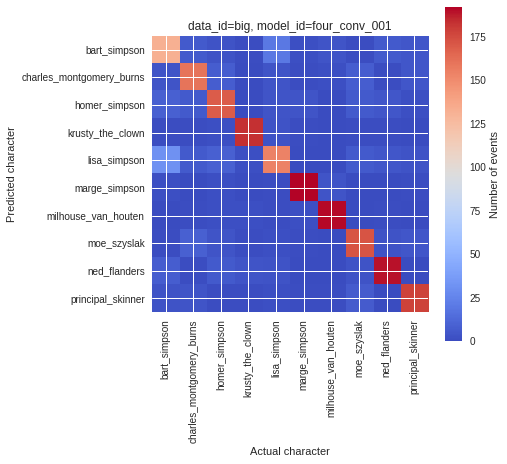

In [10]:
monitor.plot_confusion_matrix()

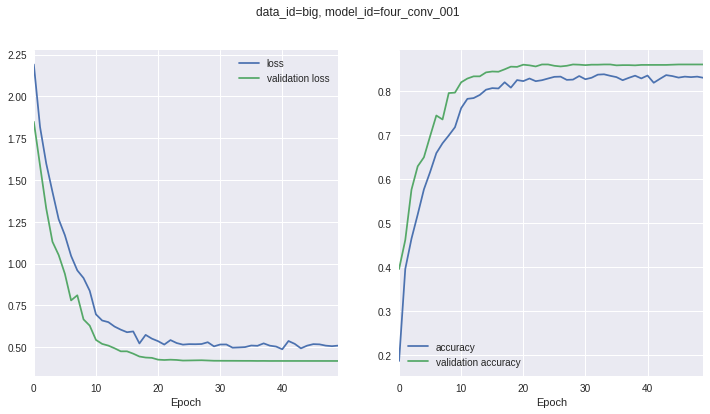

In [11]:
monitor.plot_history()

## Results for VGG16 model plus re-trained top-model
- Final validation accuracy equals 96% after 50 training epochs of the top-model without any hyper-parameter tuning. 
- The top-model was just trained once on a laptop. Training time equals 4 minutes.
- Under current settings, the top-model starts overfitting after approximately 20 epochs.

In [5]:
# init model and monitor
model = Vgg16(input_shape=data.x_train.shape[1:], n_classes=data.n_classes, model_id='vgg_001')
monitor = ModelMonitor(data=data, model=model)

Predicting with vgg_model...
Predicting with top_model...


In [6]:
# print classification report
monitor.print_classification_report()

                          precision    recall  f1-score   support

            bart_simpson       0.74      0.87      0.80       180
charles_montgomery_burns       0.76      0.87      0.81       193
           homer_simpson       0.77      0.63      0.70       205
        krusty_the_clown       0.89      0.79      0.84       193
            lisa_simpson       0.83      0.81      0.82       217
           marge_simpson       0.89      0.88      0.89       202
     milhouse_van_houten       0.88      0.88      0.88       200
             moe_szyslak       0.83      0.83      0.83       198
            ned_flanders       0.85      0.84      0.85       214
       principal_skinner       0.84      0.86      0.85       198

             avg / total       0.83      0.83      0.83      2000



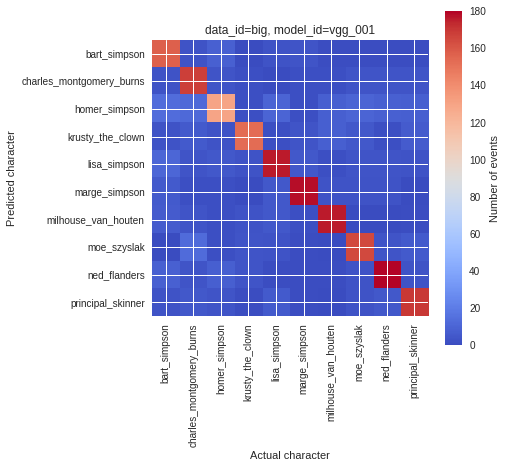

In [7]:
monitor.plot_confusion_matrix()

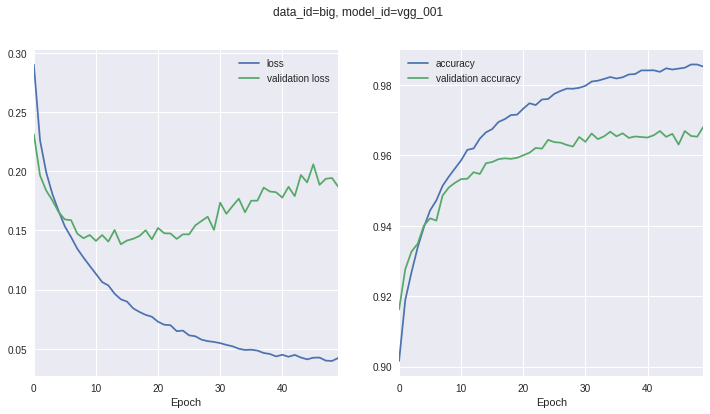

In [8]:
monitor.plot_history()